In [1]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import matthews_corrcoef, classification_report, confusion_matrix,balanced_accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, roc_auc_score
import numpy as np
import pickle
import random
from sklearn.preprocessing import OneHotEncoder
from numpy import array
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
###特征消除
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as mp,seaborn
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval
from sklearn.model_selection import StratifiedKFold, cross_val_score

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../classify_data/train_data/train_3.csv')
df

ZTF_oid          ra        dec finally_type  Iter_std  \
0      477203200001108  211.680470   2.454280           EW  0.093016   
1      833209200019642   15.149160  70.295140           EW  0.031917   
2      621201200006659  161.200100  23.344090           EW  0.092774   
3      613201400015252  102.572480  22.506110           EW  0.101224   
4      411209100020685  110.438350  -1.535370           EW  0.025324   
...                ...         ...        ...          ...       ...   
17830  701214100018015   65.219680  43.600934          YSO  0.084028   
17831  727212100007102  283.369922  42.061819           CV  0.057833   
17832  759201400000982  228.547279  44.666729          ELL  0.018035   
17833  769214200039587  323.374442  51.456080          ELL  0.065192   
17834  779206300026027   72.536742  53.826746          YSO  0.139650   

            Std  Skewness  Kurtosis  Amplitude   ChiSquare     Cusum  \
0      0.135803  0.550503 -0.921719   0.217215  170.269260  0.137309   
1      0.039787  0.528994 -0.694488   0.069232   12.235037  0.149405   
2      0.099200  0.275558 -1.082212   0.169005   49.579730  0.137027   
3      0.219922  0.899472 -0.520167   0.359041  581.621300  0.185084   
4      0.045502  0.741646 -0.645626   0.077589   25.859350  0.188243   
...         ...       ...       ...        ...         ...       ...   
17830  0.130275 -0.310169  0.650939   0.278036  121.850560  0.167880   
17831  0.080862  0.010300  0.423940   0.169020    1.545489  0.147263   
17832  0.022063  0.269701 -0.193789   0.041776    3.634361  0.057941   
17833  0.065975  0.148223 -1.215857   0.107841   21.623165  0.130791   
17834  0.169990  0.122303 -0.034163   0.341629   93.070465  0.116374   

       MedianAbsDev  Small_Kurtosis       Eta  ShapiroWilk  StetsonK  \
0          0.095618    62212.570000  1.501318     0.920993  0.850864   
1          0.024014      344.863070  1.768686     0.951518  0.844507   
2          0.080920     4682.072300  1.296008     0.935574  0.861055   
3          0.104487   803850.250000  0.773597     0.758235  0.842763   
4          0.023548     1587.470300  0.662306     0.905549  0.846647   
...             ...             ...       ...          ...       ...   
17830      0.055714    55137.380000  1.210013     0.673788  0.707184   
17831      0.048947        6.445765  1.901509     0.992141  0.767667   
17832      0.015374       34.142338  1.522213     0.983227  0.809100   
17833      0.057371      826.535640  0.743879     0.951320  0.878724   
17834      0.102258    24178.582000  1.520501     0.913789  0.824762   

       Half_mag_amplitude_ratio  Beyond1std_ratio     gskew  MedianBRP  \
0                      1.384357          0.393162  0.144729   0.230769   
1                      1.451579          0.345486  0.042870   0.430556   
2                      1.183359          0.418079  0.061385   0.248588   
3                      1.859708          0.232964  0.466366   0.429477   
4                      1.699530          0.307566  0.068325   0.411184   
...                         ...               ...       ...        ...   
17830                  0.750117          0.301989 -0.048454   0.569620   
17831                  0.943376          0.277494 -0.001343   0.508951   
17832                  1.141524          0.321799  0.012040   0.448674   
17833                  1.086450          0.424268  0.031118   0.215063   
17834                  0.859047          0.302491 -0.031789   0.480427   

         period  f1_power  percent_amplitude                       DR3Name  \
0      0.202139  0.974669           0.026069  Gaia DR3 3667443681810289280   
1      0.155629  0.835070           0.008853   Gaia DR3 533034239195739392   
2      0.136743  0.928543           0.013728   Gaia DR3 723027889964319872   
3      0.135331  0.950607           0.047095  Gaia DR3 3378716566922638592   
4      0.163037  0.943205           0.009413  Gaia DR3 3109883946714575744   
...         ...       ...                ...                   

In [3]:
df = df.drop(columns=['DR3Name', 'VarFlag', 'Lib', 'APF'])
df

ZTF_oid          ra        dec finally_type  Iter_std  \
0      477203200001108  211.680470   2.454280           EW  0.093016   
1      833209200019642   15.149160  70.295140           EW  0.031917   
2      621201200006659  161.200100  23.344090           EW  0.092774   
3      613201400015252  102.572480  22.506110           EW  0.101224   
4      411209100020685  110.438350  -1.535370           EW  0.025324   
...                ...         ...        ...          ...       ...   
17830  701214100018015   65.219680  43.600934          YSO  0.084028   
17831  727212100007102  283.369922  42.061819           CV  0.057833   
17832  759201400000982  228.547279  44.666729          ELL  0.018035   
17833  769214200039587  323.374442  51.456080          ELL  0.065192   
17834  779206300026027   72.536742  53.826746          YSO  0.139650   

            Std  Skewness  Kurtosis  Amplitude   ChiSquare     Cusum  \
0      0.135803  0.550503 -0.921719   0.217215  170.269260  0.137309   
1      0.039787  0.528994 -0.694488   0.069232   12.235037  0.149405   
2      0.099200  0.275558 -1.082212   0.169005   49.579730  0.137027   
3      0.219922  0.899472 -0.520167   0.359041  581.621300  0.185084   
4      0.045502  0.741646 -0.645626   0.077589   25.859350  0.188243   
...         ...       ...       ...        ...         ...       ...   
17830  0.130275 -0.310169  0.650939   0.278036  121.850560  0.167880   
17831  0.080862  0.010300  0.423940   0.169020    1.545489  0.147263   
17832  0.022063  0.269701 -0.193789   0.041776    3.634361  0.057941   
17833  0.065975  0.148223 -1.215857   0.107841   21.623165  0.130791   
17834  0.169990  0.122303 -0.034163   0.341629   93.070465  0.116374   

       MedianAbsDev  Small_Kurtosis       Eta  ShapiroWilk  StetsonK  \
0          0.095618    62212.570000  1.501318     0.920993  0.850864   
1          0.024014      344.863070  1.768686     0.951518  0.844507   
2          0.080920     4682.072300  1.296008     0.935574  0.861055   
3          0.104487   803850.250000  0.773597     0.758235  0.842763   
4          0.023548     1587.470300  0.662306     0.905549  0.846647   
...             ...             ...       ...          ...       ...   
17830      0.055714    55137.380000  1.210013     0.673788  0.707184   
17831      0.048947        6.445765  1.901509     0.992141  0.767667   
17832      0.015374       34.142338  1.522213     0.983227  0.809100   
17833      0.057371      826.535640  0.743879     0.951320  0.878724   
17834      0.102258    24178.582000  1.520501     0.913789  0.824762   

       Half_mag_amplitude_ratio  Beyond1std_ratio     gskew  MedianBRP  \
0                      1.384357          0.393162  0.144729   0.230769   
1                      1.451579          0.345486  0.042870   0.430556   
2                      1.183359          0.418079  0.061385   0.248588   
3                      1.859708          0.232964  0.466366   0.429477   
4                      1.699530          0.307566  0.068325   0.411184   
...                         ...               ...       ...        ...   
17830                  0.750117          0.301989 -0.048454   0.569620   
17831                  0.943376          0.277494 -0.001343   0.508951   
17832                  1.141524          0.321799  0.012040   0.448674   
17833                  1.086450          0.424268  0.031118   0.215063   
17834                  0.859047          0.302491 -0.031789   0.480427   

         period  f1_power  percent_amplitude       RAdeg      DEdeg  \
0      0.202139  0.974669           0.026069  211.680449   2.454253   
1      0.155629  0.835070           0.008853   15.149171  70.295124   
2      0.136743  0.928543           0.013728  161.200096  23.344082   
3      0.135331  0.950607           0.047095  102.572475  22.506105   
4      0.163037  0.943205           0.009413  110.438353  -1.535368   
...         ...       ...                ...         ...        ...   
17830  1.000542  0.079934         

In [4]:
# df = df.rename(columns={'type_01':'finally_type'})
# df = df[['ZTF_oid', 'ra','dec','finally_type',
# 'Iter_std','Std','Skewness', 'Kurtosis', 'Amplitude', 'ChiSquare','Cusum','MedianAbsDev',
# 'Small_Kurtosis','Eta', 'ShapiroWilk','StetsonK', 'Half_mag_amplitude_ratio','Beyond1std_ratio','gskew', 'MedianBRP','period','f1_power','percent_amplitude']]
#         #    'parallax', 'bp_rp','G-BP', 'G-RP',
#         #    'W_JK', 'J-K', 'J-H','W1mag','W2mag','W3mag']]
# df

In [5]:
##填补空值
df = df.fillna(df.median(numeric_only=True))
df = df.dropna(axis=0)

In [6]:
# df['finally_type'].replace('BE|GCAS|SDOR|WR','BE',inplace=True)
df.finally_type.value_counts()

EW      2000
SR      2000
ROT     2000
RRC     1999
RRAB    1998
EA      1996
Mira    1678
HADS    1563
YSO      781
AGN      578
CV       474
CEP      307
LPV      274
ELL      187
Name: finally_type, dtype: int64

In [7]:
### 训练集测试集划分，搭建模型
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size = 0.3, random_state=0)
print("train_set's shape:{},test_set's shape:{}".format(train_set.shape,test_set.shape))

train_set's shape:(12484, 157),test_set's shape:(5351, 157)


In [8]:
X_train_normalisation = train_set.iloc[:, 4:157]
#print(X_train_normalisation)
y_train_label = train_set['finally_type']


X_test_normalisation = test_set.iloc[:, 4:157]
y_test_label = test_set['finally_type']

le = LabelEncoder() 
train_y = le.fit_transform(y_train_label)

test_y = le.fit_transform(y_test_label)
print(test_y)

[ 2  3 10 ...  9 11  8]


In [9]:
def objectives_xgboost(space):
    classifier = xgb.XGBClassifier(objective = space['objective'],max_depth=space['max_depth'],eta = space['eta'],\
                               subsample = space['subsample'],n_estimators=space['n_estimators'],\
                                verbosity = space['verbosity'])
    classifier.fit(X_tr, y_tr)
    accuracies   = cross_val_score(estimator=classifier, X=X_tr, y=y_tr,n_jobs=-1, cv=StratifiedKFold(n_splits=n_splits),scoring='balanced_accuracy')
    CrossValMean = accuracies.mean()
    print("Accuracy {:.3f} params {}".format(CrossValMean, space))
    return{'loss':1-CrossValMean, 'status': STATUS_OK }

def hyperparameter_optimization_xgboost(multi=False):
    if multi:
        objective = 'multi:softmax'
    else:
        objective = 'binary'

    space = {'objective': 'softmax', 'max_depth': hp.choice('max_depth', np.arange(1, 20, dtype=int)), \
             'eta': hp.quniform('eta', 0.01, 0.2, 0.01), 'subsample': hp.quniform('x_subsample', 0.4, 0.9, 0.1),\
             'nthread':-1,'n_estimators':hp.randint('n_estimators',1000),'verbosity':0,\
             'booster':'gbtree'}
    trials = Trials()
    opt_parameters = fmin(fn=objectives_xgboost, space=space, algo=tpe.suggest, max_evals=5, trials=trials)
    print(opt_parameters)

    best_params = space_eval(space, opt_parameters)
    print("BEST PARAMETERS: " + str(best_params))

    return best_params
def analysis_xgboost(X_train, y_train,multi):
    opt_parameters_xgboost = hyperparameter_optimization_xgboost(multi=multi)
    print(opt_parameters_xgboost)
    fit_model_xgboost = xgb.XGBClassifier(**opt_parameters_xgboost).fit(X_train,y_train)
    return opt_parameters_xgboost, fit_model_xgboost
X_tr = X_train_normalisation
y_tr = train_y
n_splits = 5
opt_xgboost, fit_model_xgboost = analysis_xgboost(X_train=X_train_normalisation, y_train=train_y, multi=True)
test_predict_hyperopt = fit_model_xgboost.predict(X_test_normalisation)

Accuracy 0.926 params {'booster': 'gbtree', 'eta': 0.2, 'max_depth': 7, 'n_estimators': 950, 'nthread': -1, 'objective': 'softmax', 'subsample': 0.7000000000000001, 'verbosity': 0}
Accuracy 0.931 params {'booster': 'gbtree', 'eta': 0.06, 'max_depth': 19, 'n_estimators': 669, 'nthread': -1, 'objective': 'softmax', 'subsample': 0.6000000000000001, 'verbosity': 0}
Accuracy 0.926 params {'booster': 'gbtree', 'eta': 0.04, 'max_depth': 2, 'n_estimators': 478, 'nthread': -1, 'objective': 'softmax', 'subsample': 0.5, 'verbosity': 0}
Accuracy 0.929 params {'booster': 'gbtree', 'eta': 0.08, 'max_depth': 19, 'n_estimators': 438, 'nthread': -1, 'objective': 'softmax', 'subsample': 0.4, 'verbosity': 0}
Accuracy 0.929 params {'booster': 'gbtree', 'eta': 0.08, 'max_depth': 12, 'n_estimators': 880, 'nthread': -1, 'objective': 'softmax', 'subsample': 0.5, 'verbosity': 0}
100%|██████████| 5/5 [32:06<00:00, 385.24s/trial, best loss: 0.06911854915207516]
{'eta': 0.06, 'max_depth': 18, 'n_estimators': 669,

In [10]:
classification_result = classification_report(test_y, test_predict_hyperopt,target_names = le.classes_)
print("-----------超参数优化后的结果：---------------")
print(classification_result)

-----------超参数优化后的结果：---------------
              precision    recall  f1-score   support

         AGN       1.00      0.99      1.00       176
         CEP       0.99      0.96      0.97        95
          CV       0.99      0.99      0.99       140
          EA       0.98      0.98      0.98       655
         ELL       0.98      0.89      0.93        55
          EW       0.96      0.97      0.97       592
        HADS       1.00      0.97      0.99       453
         LPV       0.91      0.50      0.65        84
        Mira       0.98      0.99      0.99       543
         ROT       0.96      0.98      0.97       573
        RRAB       0.99      1.00      0.99       595
         RRC       0.98      0.99      0.98       591
          SR       0.93      0.99      0.96       573
         YSO       0.96      0.92      0.94       226

    accuracy                           0.97      5351
   macro avg       0.97      0.94      0.95      5351
weighted avg       0.97      0.97      0.97

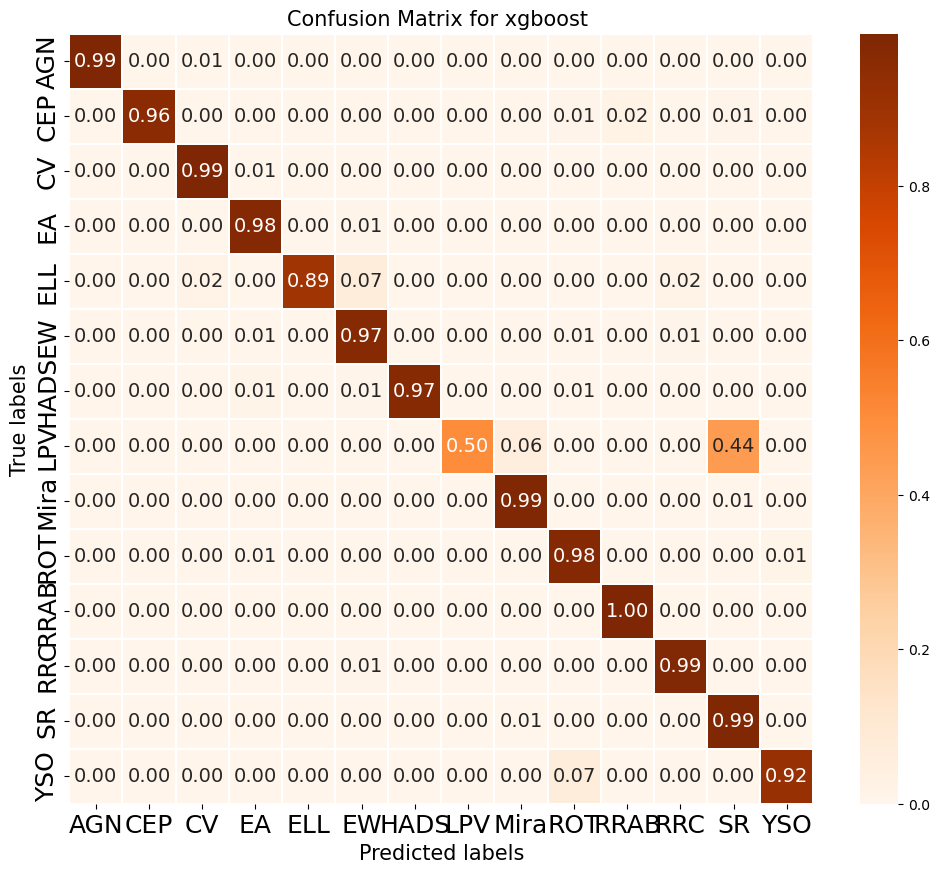

In [11]:
conf_mat = confusion_matrix(test_y, test_predict_hyperopt,normalize='true')
#savefig_dir = "/mnt/storage-data/qiaopeiyun/variable_classification/code/分布式/Classification_Algorithm/FL/figure/RF_51_RFECV_confusion_matrix.jpg"
plt.figure(figsize= (12,10))
ax= plt.subplot()
seaborn.heatmap(conf_mat, annot=True,cmap= 'Oranges', ax = ax,fmt = '.2f',linewidths=0.1, annot_kws={"fontsize":14})
ax.set_xlabel('Predicted labels',fontsize = 15)
ax.set_ylabel('True labels',fontsize = 15)
ax.set_title('Confusion Matrix for xgboost ',fontsize = 15)
ax.xaxis.set_ticklabels(le.classes_,fontsize = 18)
ax.yaxis.set_ticklabels(le.classes_,fontsize = 18)
plt.savefig('./photo/xgboost_confusion.pdf')
plt.show()

/home/dengxuan/miniconda3/envs/nonperiodic/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


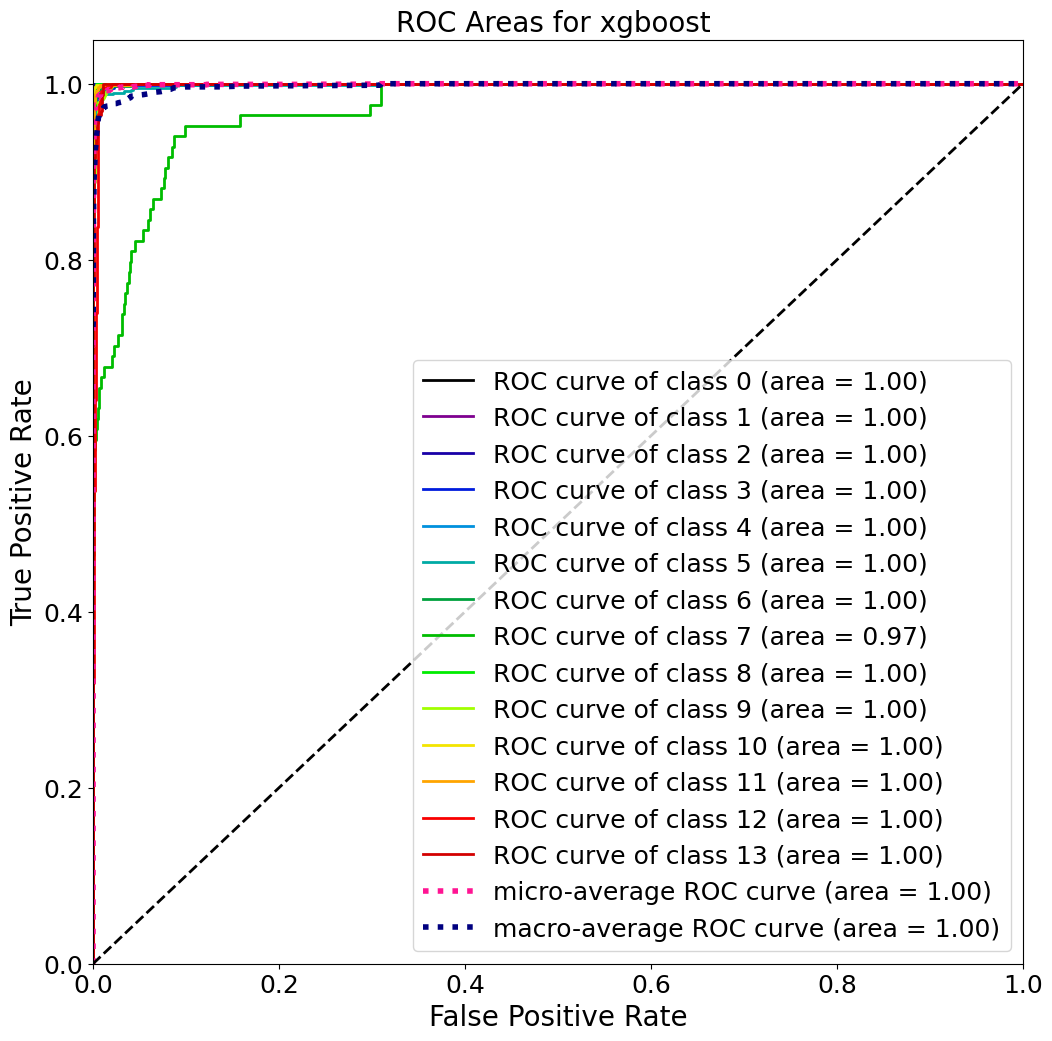

In [12]:
import scikitplot as skplt
y_pred_proba = fit_model_xgboost.predict_proba(X_test_normalisation)
plt.figure(figsize= (12,12))
ax= plt.subplot()
skplt.metrics.plot_roc_curve(test_y,y_pred_proba,ax= ax)
ax.set_xlabel('False Positive Rate',fontsize = 20)
ax.set_ylabel('True Positive Rate',fontsize = 20)
ax.set_title('ROC Areas for xgboost ',fontsize = 20) 
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize =18)
plt.savefig('./xgboost_ROC.pdf')
plt.show()

特征重要度
       feature  importance
123       PQSO    0.139822
102       e_RV    0.086054
5    ChiSquare    0.081998
2     Skewness    0.058138
16      period    0.041348
..         ...         ...
24       SolID    0.000000
90       RPmag    0.000000
147    RAJ2000    0.000000
148    DEJ2000    0.000000
91     e_RPmag    0.000000

[153 rows x 2 columns]
前30名特征
                      feature  importance
123                      PQSO    0.139822
102                      e_RV    0.086054
5                   ChiSquare    0.081998
2                    Skewness    0.058138
16                     period    0.041348
134                 B_Fe/H_xa    0.038685
3                    Kurtosis    0.029369
128                 B_Teff_xa    0.027441
75                         FG    0.023639
100                      G-RP    0.021903
31                       RPlx    0.019820
56                      nueff    0.018460
14                      gskew    0.017551
18          percent_amplitude    0.016660
112      

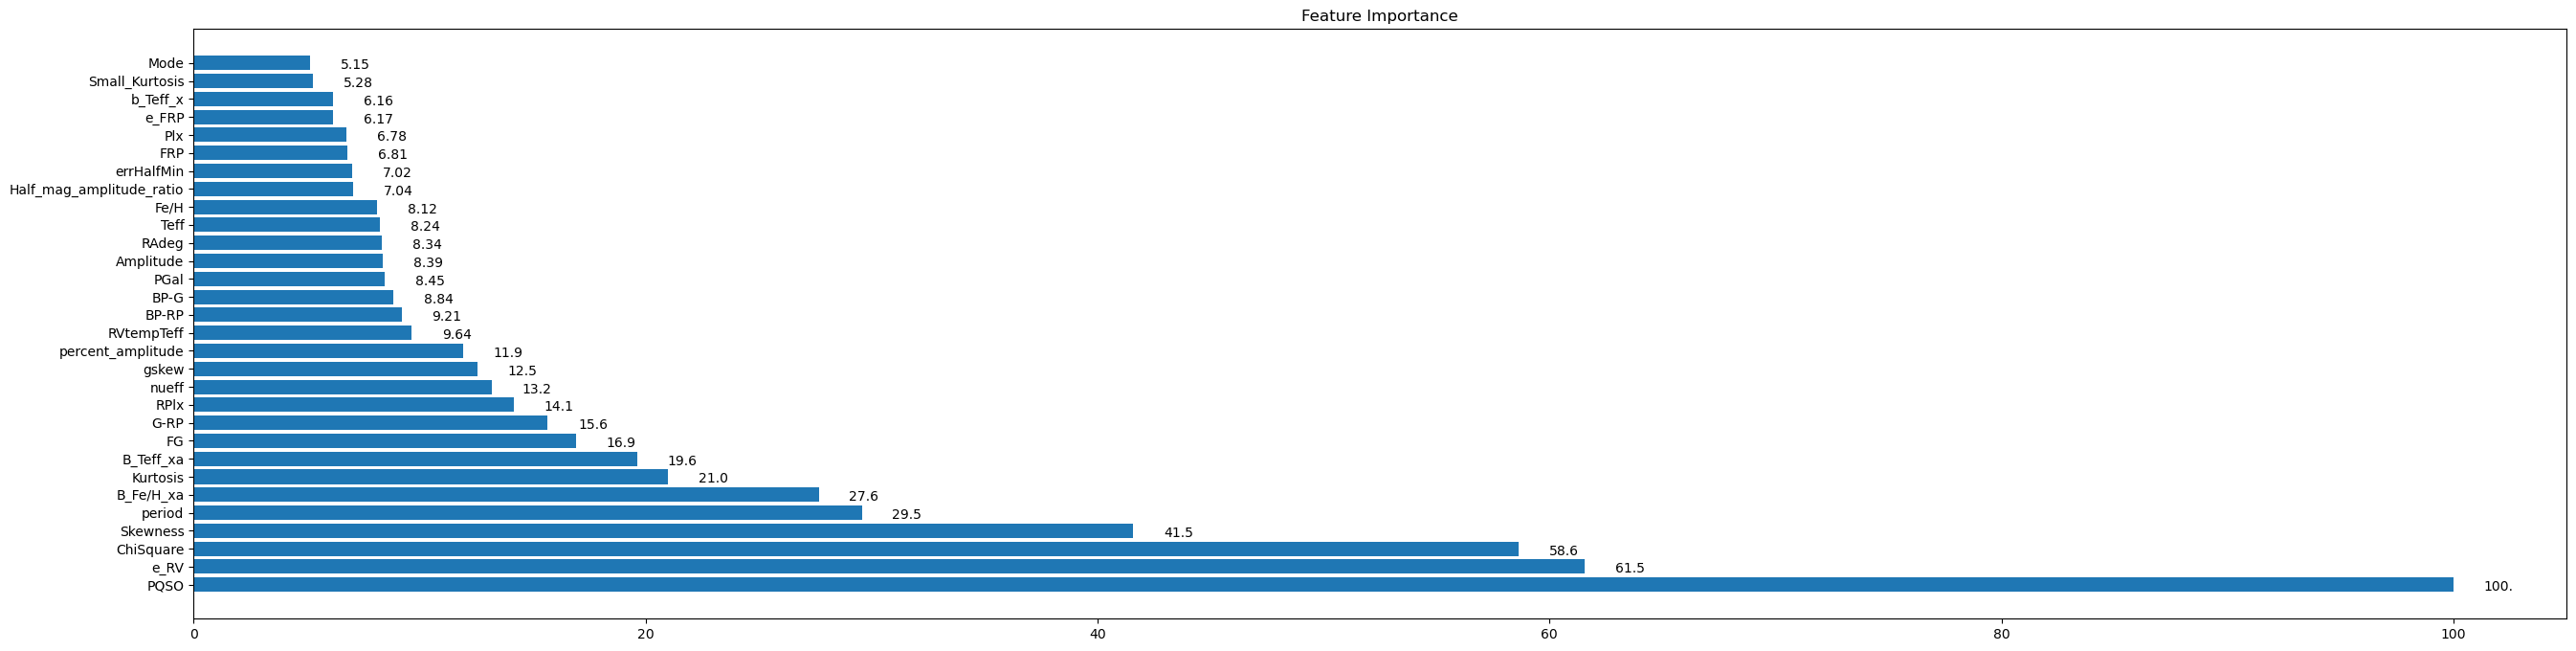

In [13]:
## 特征重要性
#特征重要性
features = pd.DataFrame()
features['feature'] = train_set.iloc[:, 4:157].columns
#print(features)
features['importance'] =fit_model_xgboost.feature_importances_
print("特征重要度")
print(features.sort_values(by =['importance'], ascending=False))
# 显示最重要的前20个特征变量
print("前30名特征")
print(features.sort_values(by =['importance'], ascending=False).head(30))
# Feature = features[:20]
# print(Feature)
#feature_importances是模型训练后特征重要性函数的返回值
#title是该图片的标题
#feature_names是模型重要性的名字函数的返回值
def plot_feature_importances(feature_importances,title,feature_names):
#    将重要性值标准化
    feature_importances = 100.0*(feature_importances/max(feature_importances))
    index_sorted = np.flipud(np.argsort(feature_importances)) #上短下长
    #index_sorted装的是从小到大，排列的下标
    #print(feature_importances)
    #index_sorted = np.argsort(feature_importances)# 上长下短
    #print(index_sorted)
    index_sorted = index_sorted[:30]
    #    让X坐标轴上的标签居中显示
    bar_width = 1
    # 相当于y坐标
    pos = np.arange(len(index_sorted))+bar_width/2
    plt.figure(figsize=(32,8))
    # plt.barh(y,x)
    plt.barh(pos,feature_importances[index_sorted],align='center')
    # 在柱状图上面显示具体数值,ha参数控制参数水平对齐方式,va控制垂直对齐方式
    for y, x in enumerate(feature_importances[index_sorted]):
        plt.text(x+2, y, '%.4s' %x, ha='center', va='bottom')
    plt.yticks(pos,feature_names[index_sorted])
    plt.title(title)
    plt.savefig('./xgboost_feature_importance.pdf')
    plt.show()
    
plot_feature_importances(features['importance'],'Feature Importance',features['feature'])

In [14]:
###保存model
import pickle

In [15]:
filename = './model/xgboost_model3.sav'
pickle.dump(fit_model_xgboost, open(filename, 'wb'))

In [16]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
test_predict_hyperopt = loaded_model.predict(X_test_normalisation)

In [17]:
classification_result = classification_report(test_y, test_predict_hyperopt,target_names = le.classes_)
print("-----------XGBoost超参数优化后的结果：---------------")
print(classification_result)

-----------XGBoost超参数优化后的结果：---------------
              precision    recall  f1-score   support

         AGN       1.00      0.99      1.00       176
         CEP       0.99      0.96      0.97        95
          CV       0.99      0.99      0.99       140
          EA       0.98      0.98      0.98       655
         ELL       0.98      0.89      0.93        55
          EW       0.96      0.97      0.97       592
        HADS       1.00      0.97      0.99       453
         LPV       0.91      0.50      0.65        84
        Mira       0.98      0.99      0.99       543
         ROT       0.96      0.98      0.97       573
        RRAB       0.99      1.00      0.99       595
         RRC       0.98      0.99      0.98       591
          SR       0.93      0.99      0.96       573
         YSO       0.96      0.92      0.94       226

    accuracy                           0.97      5351
   macro avg       0.97      0.94      0.95      5351
weighted avg       0.97      0.97   